In [ ]:
library(SingleCellExperiment)
library(tidyverse)
library(dplyr)
library(ggplot2)
library(multinichenetr)
library(Seurat) 
library(readxl)
library(writexl)
library(repr)

options(Seurat.object.assay.version = "v3")

# load data

## seuratdata

In [2]:
seurat_obj = readRDS("/data2/xiangwei/projects/zhaolian/10polyIntegrate/results/sctAnnotationSeuObj")

In [3]:
seurat_obj
head(seurat_obj@meta.data)

An object of class Seurat 
50442 features across 45620 samples within 2 assays 
Active assay: SCT (22704 features, 3000 variable features)
 3 layers present: counts, data, scale.data
 1 other assay present: RNA
 8 dimensional reductions calculated: pca, umap.unintegrated, integrated.cca, integrated.rpca, integrated.harmony, umap.cca, umap.rpca, umap.harmony

,nCount_RNA,nFeature_RNA,sampleID,percent.mt,Phase,sampleType,sampleTypeFine,nCount_SCT,nFeature_SCT,unintegrated_clusters,seurat_clusters,cca_cluster,rpca_cluster,harmony_cluster,main,fine
,<dbl>,<dbl>,<fct>,<dbl>,<chr>,<chr>,<fct>,<dbl>,<int>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>
WT_1.bcHTXJ,5633,2155,WT1,3.586011,G1,normal,WT1,2575,1386,8,10,16,10,10,Epithelial,Epi-Krt20
WT_1.bcHGRE,10487,3855,WT1,5.912082,G2M,normal,WT1,2180,1408,8,11,0,9,11,Epithelial,Epi-Srgn
WT_1.bcHIFA,9429,3137,WT1,6.352742,G2M,normal,WT1,2197,1152,8,10,16,10,10,Epithelial,Epi-Krt20
WT_1.bcHFJN,7902,2746,WT1,7.884080,G1,normal,WT1,2205,1178,8,10,16,10,10,Epithelial,Epi-Krt20
WT_1.bcGOTP,7605,3330,WT1,4.865220,S,normal,WT1,2136,1383,20,0,11,22,0,Neutrophil,Neutrophil
WT_1.bcFBTL,8837,2901,WT1,6.551997,G1,normal,WT1,2213,1189,8,10,3,10,10,Epithelial,Epi-Krt20


In [4]:
seurat_obj=subset(seurat_obj,sampleID %in% c("WT1","WT2"),invert=T)

In [5]:
seurat_obj=subset(seurat_obj,main %in% c("Epithelial"))

In [8]:
seurat_obj=subset(seurat_obj,fine %in% c("Epi-Stem-like"),invert=T)

In [9]:
seurat_obj$fine=as.character(seurat_obj$fine)
seurat_obj$sampleID=as.character(seurat_obj$sampleID)
table(seurat_obj$sampleID,seurat_obj$fine)

          
           Epi-Arglu1 Epi-Goblet Epi-Krt20 Epi-Mdga2 Epi-Mgst3 Epi-Mt3
  132_T1          206         44        70       123       509     476
  142_T2          136         34       117       153       328     458
  142_T5-4         61         21        23        65       104     299
  148_T1            0         39        79        39       335     238
  148_T3          106         70       236        86       230     290
  151_T4            1         81        97       525       921     982
  17_T4            14        207        53       244       676     734
  18_T3             2        112        81       673       339     764
  18_T4            40         51        57       167       383     327
          
           Epi-Peak1 Epi-Ptprd Epi-Srgn
  132_T1         178       102       56
  142_T2         213        98      123
  142_T5-4        54        24       38
  148_T1         132        71      142
  148_T3          91        69       72
  151_T4         405       5

In [10]:
cellID=colnames(seurat_obj)

## Np

In [11]:
npvalue=read_xlsx("/data2/xiangwei/projects/zhaolian_old/BfinalSample/Np_new2.xlsx")%>% select(sampleID,Np,`1/Np`) %>% 
mutate(stage=if_else(Np>3,"early","late"))%>%as.data.frame()

In [12]:
npvalue

sampleID,Np,1/Np,stage
<chr>,<dbl>,<dbl>,<chr>
148_T1,1.604244,0.62334657,late
148_T3,2.670790,0.37442101,late
142_T5-4,2.802020,0.35688537,late
132_T1,4.075022,0.24539743,early
142_T2,5.653750,0.17687375,early
18_T3,6.088663,0.16423968,early
18_T4,9.575361,0.10443470,early
17_T4,11.891945,0.08409053,early
151_T4,32.589013,0.03068519,early


## add metadata

In [13]:
identical(rownames(seurat_obj@meta.data),cellID)

[1] TRUE

In [14]:
seurat_obj@meta.data=seurat_obj@meta.data%>%left_join(npvalue,by = "sampleID")

In [15]:
rownames(seurat_obj@meta.data)=cellID

In [16]:
seurat_obj$sampleID=factor(seurat_obj$sampleID,levels = c('148_T1','148_T3','142_T5-4','132_T1',
                                                    '142_T2','18_T3','18_T4','17_T4','151_T4'
                                                              ))

In [17]:
table(seurat_obj$stage,seurat_obj$sampleID)

       
        148_T1 148_T3 142_T5-4 132_T1 142_T2 18_T3 18_T4 17_T4 151_T4
  early      0      0        0   1764   1660  2561  1416  3200   3583
  late    1075   1250      689      0      0     0     0     0      0

## load LR network ligand-target matrix

In [18]:
lr_network = readRDS("/data2/xiangwei/projects/zhaolian/13nicheNet/sourcedata/lr_network_mouse_21122021.rds")
ligand_target_matrix = readRDS("/data2/xiangwei/projects/zhaolian/13nicheNet/sourcedata/ligand_target_matrix_nsga2r_final_mouse.rds")
#weighted_networks = readRDS("sourcedata/weighted_networks_nsga2r_final_mouse.rds")

In [19]:
head(lr_network)
head(ligand_target_matrix)
dim(lr_network)
dim(ligand_target_matrix)

from,to,database,source
<chr>,<chr>,<chr>,<chr>
2300002M23Rik,Ddr1,omnipath,omnipath
2610528A11Rik,Gpr15,omnipath,omnipath
9530003J23Rik,Itgal,omnipath,omnipath
a,Atrn,omnipath,omnipath
a,F11r,omnipath,omnipath
a,Mc1r,omnipath,omnipath


,2300002M23Rik,2610528A11Rik,9530003J23Rik,a,A2m,Aanat,Abca1,Ace,Ace2,Acp4,⋯,Wnt8a,Wnt8b,Wnt9a,Wnt9b,Xcl1,Yars,Zdhhc5,Znrf3,Zp3,Zpbp2
0610005C13Rik,0.000000e+00,0.000000e+00,1.311297e-05,0.000000e+00,1.390053e-05,0.000000e+00,0.0000000000,1.412815e-05,0.0000000000,2.008273e-05,⋯,0.000000e+00,0.0000000000,0.0000000000,0.0000000000,0.0000000000,1.256898e-05,1.191513e-05,0.000000e+00,1.048895e-04,0.0000000000
0610009B22Rik,0.000000e+00,0.000000e+00,1.269301e-05,0.000000e+00,1.345536e-05,0.000000e+00,0.0000000000,1.367568e-05,0.0000000000,1.943957e-05,⋯,0.000000e+00,0.0000000000,0.0000000000,0.0000000000,0.0000000000,1.216645e-05,1.153355e-05,0.000000e+00,1.372048e-05,0.0000000000
0610009L18Rik,8.872902e-05,4.977197e-05,2.581909e-04,7.570125e-05,9.802264e-05,6.938897e-05,0.0001633073,1.093834e-04,0.0000826510,8.952951e-05,⋯,6.690247e-05,0.0001068754,0.0000615406,0.0001264335,0.0000663885,1.189075e-04,8.871911e-05,6.409725e-05,6.789657e-05,0.0002635794
0610010F05Rik,2.194046e-03,1.111556e-03,3.142374e-03,1.631658e-03,2.585820e-03,1.829664e-03,0.0032786580,3.725140e-03,0.0018190031,1.935844e-03,⋯,1.872440e-03,0.0018293232,0.0017207604,0.0017112573,0.0015283759,2.680725e-03,2.795506e-03,2.034167e-03,2.740786e-03,0.0017907947
0610010K14Rik,2.271606e-03,9.360769e-04,3.546140e-03,1.697713e-03,2.632082e-03,1.658516e-03,0.0023091005,5.260966e-03,0.0015937583,1.800489e-03,⋯,1.517263e-03,0.0017381587,0.0014741893,0.0016434596,0.0020903582,2.258838e-03,2.311240e-03,1.618939e-03,2.133887e-03,0.0019620773
0610012G03Rik,6.619036e-04,2.958259e-04,9.295219e-04,4.211287e-04,6.271871e-04,4.077356e-04,0.0007904198,7.516847e-04,0.0004514856,4.603956e-04,⋯,9.815179e-04,0.0008634839,0.0010584462,0.0008094492,0.0003489492,6.116689e-04,5.256973e-04,7.079710e-04,1.190386e-03,0.0004785270


[1] 5668    4

[1] 22521  1287

In [20]:
lr_network = lr_network %>% dplyr::rename(ligand = from, receptor = to) %>% distinct(ligand, receptor) %>% 
mutate(ligand = make.names(ligand), receptor = make.names(receptor))

colnames(ligand_target_matrix) = colnames(ligand_target_matrix) %>% make.names()
rownames(ligand_target_matrix) = rownames(ligand_target_matrix) %>% make.names()

dim(lr_network)

[1] 5614    2

# Step 0: Read in SingleCellExperiment Objects

In [21]:
DefaultAssay(seurat_obj)="RNA"

In [ ]:
seurat_obj=JoinLayers(seurat_obj)
seurat_obj

In [23]:
sce = seurat_obj

In [ ]:
# convert a v5 assay to a v3 assay
sce[["RNA"]] <- as(object = seurat_obj[["RNA"]], Class = "Assay")

In [ ]:
sce[["SCT"]] <- as(object = seurat_obj[["SCT"]], Class = "Assay")

In [27]:
sce=Seurat::as.SingleCellExperiment(sce,assay = "RNA")

In [28]:
sce

class: SingleCellExperiment 
dim: 27738 17198 
metadata(0):
assays(2): counts logcounts
rownames(27738): 0610006L08Rik 0610009B22Rik ... mt-Nd5 mt-Nd6
rowData names(0):
colnames(17198): 17T4_AAACCTGAGCCTCGTG-1 17T4_AAACCTGAGCTAGTGG-1 ...
  148T3_TTTGCGCCAATAACGA-1 148T3_TTTGCGCTCCAGAGGA-1
colData names(20): nCount_RNA nFeature_RNA ... stage ident
reducedDimNames(8): PCA UMAP.UNINTEGRATED ... UMAP.RPCA UMAP.HARMONY
mainExpName: RNA
altExpNames(0):

In [ ]:
sce = alias_to_symbol_SCE(sce, "mouse") %>% makenames_SCE()

In [30]:
SummarizedExperiment::colData(sce)$sampleID = SummarizedExperiment::colData(sce)$sampleID  %>% make.names()
SummarizedExperiment::colData(sce)$fine = SummarizedExperiment::colData(sce)$fine  %>% make.names()

In [31]:
table(SummarizedExperiment::colData(sce)$sampleID)


  X132_T1   X142_T2 X142_T5.4   X148_T1   X148_T3   X151_T4    X17_T4    X18_T3 
     1764      1660       689      1075      1250      3583      3200      2561 
   X18_T4 
     1416 

In [32]:
SummarizedExperiment::colData(sce)$sampleID=factor(SummarizedExperiment::colData(sce)$sampleID,
                                                   levels = c('X148_T1','X148_T3','X142_T5.4','X132_T1',
                                                    'X142_T2','X18_T3','X18_T4','X17_T4','X151_T4'))

In [34]:
table(SummarizedExperiment::colData(sce)$sampleID,
      SummarizedExperiment::colData(sce)$stage)

           
            early late
  X148_T1       0 1075
  X148_T3       0 1250
  X142_T5.4     0  689
  X132_T1    1764    0
  X142_T2    1660    0
  X18_T3     2561    0
  X18_T4     1416    0
  X17_T4     3200    0
  X151_T4    3583    0

# Step 0: Prepare the cell-cell communication analysis

In [35]:
sample_id = "sampleID"
group_id = "stage"
celltype_id = "fine"
covariates = NA
batches = NA

senders_oi = SummarizedExperiment::colData(sce)[,celltype_id] %>% unique()
receivers_oi = SummarizedExperiment::colData(sce)[,celltype_id] %>% unique()
senders_oi
receivers_oi
#使用所有的样本和细胞类型
sce = sce[, SummarizedExperiment::colData(sce)[,celltype_id] %in% c(senders_oi, receivers_oi)]
table(SummarizedExperiment::colData(sce)[,sample_id],
      SummarizedExperiment::colData(sce)[,celltype_id])

[1] "Epi.Mt3"    "Epi.Mgst3"  "Epi.Srgn"   "Epi.Peak1"  "Epi.Krt20" 
[6] "Epi.Ptprd"  "Epi.Mdga2"  "Epi.Goblet" "Epi.Arglu1"

[1] "Epi.Mt3"    "Epi.Mgst3"  "Epi.Srgn"   "Epi.Peak1"  "Epi.Krt20" 
[6] "Epi.Ptprd"  "Epi.Mdga2"  "Epi.Goblet" "Epi.Arglu1"

           
            Epi.Arglu1 Epi.Goblet Epi.Krt20 Epi.Mdga2 Epi.Mgst3 Epi.Mt3
  X148_T1            0         39        79        39       335     238
  X148_T3          106         70       236        86       230     290
  X142_T5.4         61         21        23        65       104     299
  X132_T1          206         44        70       123       509     476
  X142_T2          136         34       117       153       328     458
  X18_T3             2        112        81       673       339     764
  X18_T4            40         51        57       167       383     327
  X17_T4            14        207        53       244       676     734
  X151_T4            1         81        97       525       921     982
           
            Epi.Peak1 Epi.Ptprd Epi.Srgn
  X148_T1         132        71      142
  X148_T3          91        69       72
  X142_T5.4        54        24       38
  X132_T1         178       102       56
  X142_T2         213        98      123
  X18_T3  

# Step 1: Extract cell type abundance and expression information

In [36]:
min_cells = 10

In [37]:
abundance_expression_info = get_abundance_expression_info(sce = sce, sample_id = sample_id, group_id = group_id, celltype_id = celltype_id, 
                                                          min_cells = min_cells, senders_oi = senders_oi, receivers_oi = receivers_oi, 
                                                          lr_network = lr_network, batches = batches)

Warning message in DGEList.default(pb@assays@data[[celltype_oi]]):
“At least one library size is zero”
Warning message in get_avg_frac_exprs_abund(sce = sce, sample_id = sample_id, celltype_id = celltype_id, :
“There are some genes with NA/NaN fraction of expression. This is the result of the muscat function `calcExprFreqs` which will give NA/NaN when there are no cells of a particular cell type in a particular group or no cells of a cell type in one sample. As a temporary fix, we give all these genes an expression fraction of 0 in that group for that cell type”


## Interpretation of cell type abundance information

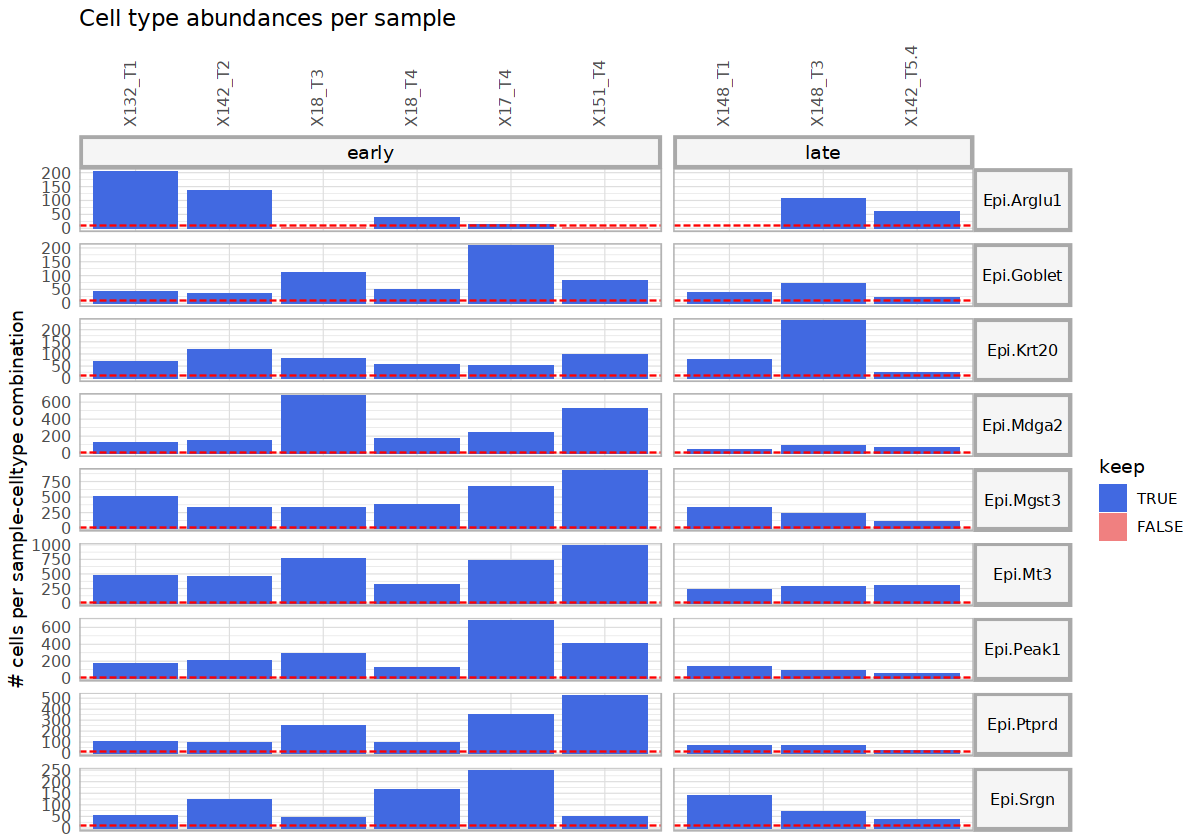

In [38]:
options(repr.plot.width=10)
abundance_expression_info$abund_plot_sample

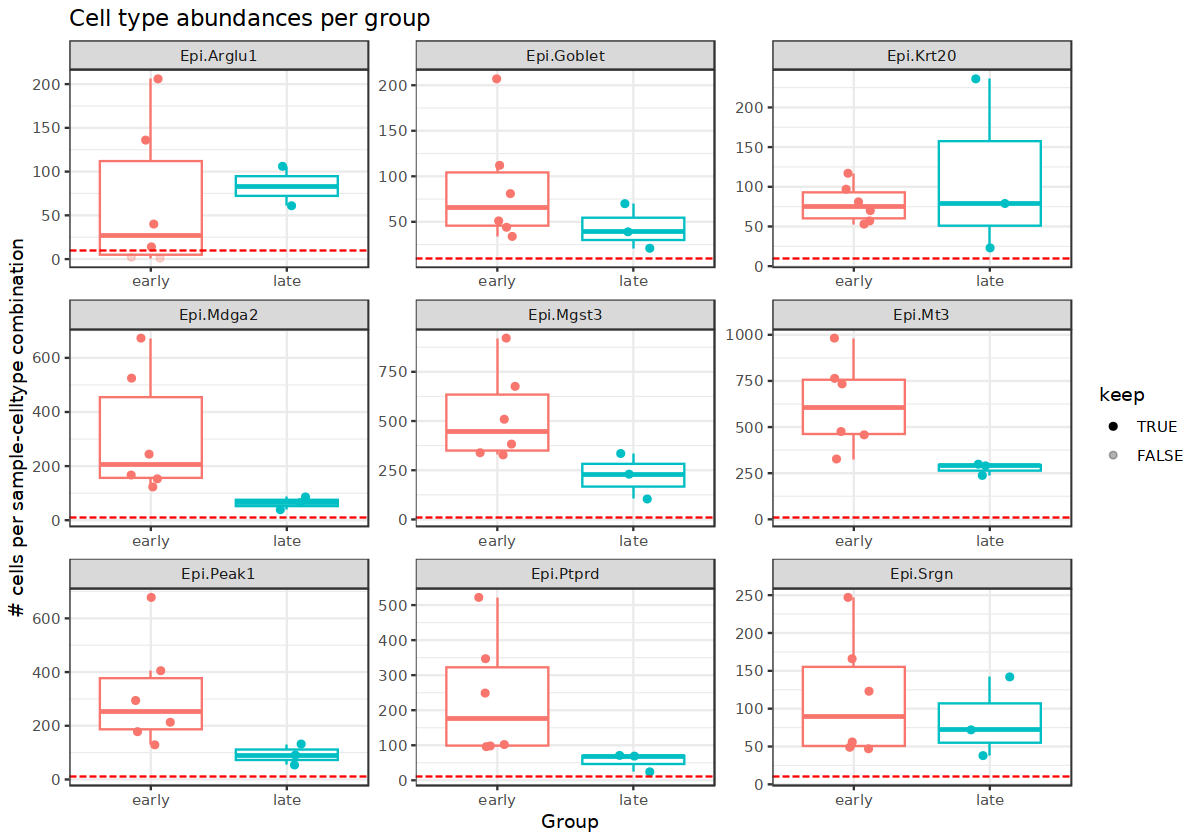

In [39]:
abundance_expression_info$abund_plot_group

In [40]:
ggsave(abundance_expression_info$abund_plot_group,filename = "results/plot/supplyCellNumPerGroup.pdf",width = 10,height = 10)

In [41]:
abundance_expression_info$abundance_data_receiver %>% head()

sample,receiver,n_cells_receiver,group,keep_receiver
<fct>,<chr>,<int>,<chr>,<dbl>
X148_T1,Epi.Goblet,39,late,1
X148_T1,Epi.Krt20,79,late,1
X148_T1,Epi.Mdga2,39,late,1
X148_T1,Epi.Mgst3,335,late,1
X148_T1,Epi.Mt3,238,late,1
X148_T1,Epi.Peak1,132,late,1


## Interpretation of expression information

In [42]:
abundance_expression_info$celltype_info$avg_df %>% head()

gene,sample,average_sample,celltype
<chr>,<chr>,<dbl>,<fct>
X0610006L08Rik,X17_T4,0.00000000,Epi.Mt3
X0610009B22Rik,X17_T4,0.24463482,Epi.Mt3
X0610009E02Rik,X17_T4,0.01260592,Epi.Mt3
X0610009L18Rik,X17_T4,0.04937930,Epi.Mt3
X0610010F05Rik,X17_T4,0.14611506,Epi.Mt3
X0610010K14Rik,X17_T4,0.25802767,Epi.Mt3


In [43]:
abundance_expression_info$celltype_info$frq_df %>% head()

gene,sample,fraction_sample,celltype,group,expressed_sample,n_expressed,expressed_celltype
<chr>,<chr>,<dbl>,<chr>,<chr>,<lgl>,<int>,<lgl>
X0610006L08Rik,X17_T4,0.00000000,Epi.Mt3,early,FALSE,0,FALSE
X0610009B22Rik,X17_T4,0.27520436,Epi.Mt3,early,TRUE,9,TRUE
X0610009E02Rik,X17_T4,0.01907357,Epi.Mt3,early,FALSE,7,TRUE
X0610009L18Rik,X17_T4,0.07220708,Epi.Mt3,early,TRUE,9,TRUE
X0610010F05Rik,X17_T4,0.20708447,Epi.Mt3,early,TRUE,9,TRUE
X0610010K14Rik,X17_T4,0.29836512,Epi.Mt3,early,TRUE,9,TRUE


In [44]:
abundance_expression_info$celltype_info$pb_df %>% head()

gene,sample,pb_sample,celltype
<chr>,<chr>,<dbl>,<fct>
X0610006L08Rik,X148_T1,0.000000,Epi.Mt3
X0610009B22Rik,X148_T1,6.877749,Epi.Mt3
X0610009E02Rik,X148_T1,0.433121,Epi.Mt3
X0610009L18Rik,X148_T1,3.285961,Epi.Mt3
X0610010F05Rik,X148_T1,5.239011,Epi.Mt3
X0610010K14Rik,X148_T1,6.286017,Epi.Mt3


In [45]:
abundance_expression_info$sender_receiver_info$avg_df %>% head()

sample,sender,receiver,ligand,receptor,avg_ligand,avg_receptor,ligand_receptor_prod
<chr>,<fct>,<fct>,<chr>,<chr>,<dbl>,<dbl>,<dbl>
X148_T1,Epi.Krt20,Epi.Krt20,Epcam,Cldn7,4.071422,3.312358,13.48601
X151_T4,Epi.Arglu1,Epi.Arglu1,Tyrobp,Trem1,3.822304,3.150798,12.04331
X148_T1,Epi.Mgst3,Epi.Krt20,Epcam,Cldn7,3.472229,3.312358,11.50126
X142_T2,Epi.Krt20,Epi.Krt20,Epcam,Cldn7,3.930621,2.817565,11.07478
X148_T1,Epi.Krt20,Epi.Mgst3,Epcam,Cldn7,4.071422,2.665334,10.85170
X148_T1,Epi.Goblet,Epi.Krt20,Epcam,Cldn7,3.036792,3.312358,10.05894


# Step 2: Perform genome-wide differential expression analysis

## Define the contrasts and covariates of interest for the DE analysis

In [46]:
min_cells = 10
contrasts_oi = c("'late-early','early-late'")
contrast_tbl = tibble(
  contrast = c("late-early","early-late"), 
  group = c("late","early"))

sce = sce[, SummarizedExperiment::colData(sce)[,group_id] %in% contrast_tbl$group]

In [47]:
contrast_tbl

contrast,group
<chr>,<chr>
late-early,late
early-late,early


## DE analysis

In [48]:
DE_info = get_DE_info(sce = sce, sample_id = sample_id, group_id = group_id, celltype_id = celltype_id, 
                      batches = batches, covariates = covariates, contrasts_oi = contrasts_oi, min_cells = min_cells)

[1] "DE analysis is done:"
[1] "included cell types are:"
[1] "Epi.Mt3"    "Epi.Mgst3"  "Epi.Srgn"   "Epi.Peak1"  "Epi.Krt20" 
[6] "Epi.Ptprd"  "Epi.Mdga2"  "Epi.Goblet" "Epi.Arglu1"


In [49]:
names(DE_info)

[1] "celltype_de"             "hist_pvals"             
[3] "celltype_de_findmarkers" "hist_pvals_findmarkers"

In [50]:
DE_info$celltype_de$de_output_tidy %>% arrange(p_val) %>% head()

gene,cluster_id,logFC,logCPM,F,p_val,p_adj.loc,p_adj,contrast
<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
Grik3,Epi.Srgn,3.62,9.71,147.0,1.61e-08,0.000111,0.000111,late-early
Grik3,Epi.Srgn,-3.62,9.71,147.0,1.61e-08,0.000111,0.000111,early-late
Tyrobp,Epi.Mdga2,2.86,5.46,99.3,4.98e-07,0.005260,0.005260,late-early
Tyrobp,Epi.Mdga2,-2.86,5.46,99.3,4.98e-07,0.005260,0.005260,early-late
Il1b,Epi.Mdga2,3.87,6.26,89.6,8.50e-07,0.005260,0.005260,late-early
Il1b,Epi.Mdga2,-3.87,6.26,89.6,8.50e-07,0.005260,0.005260,early-late


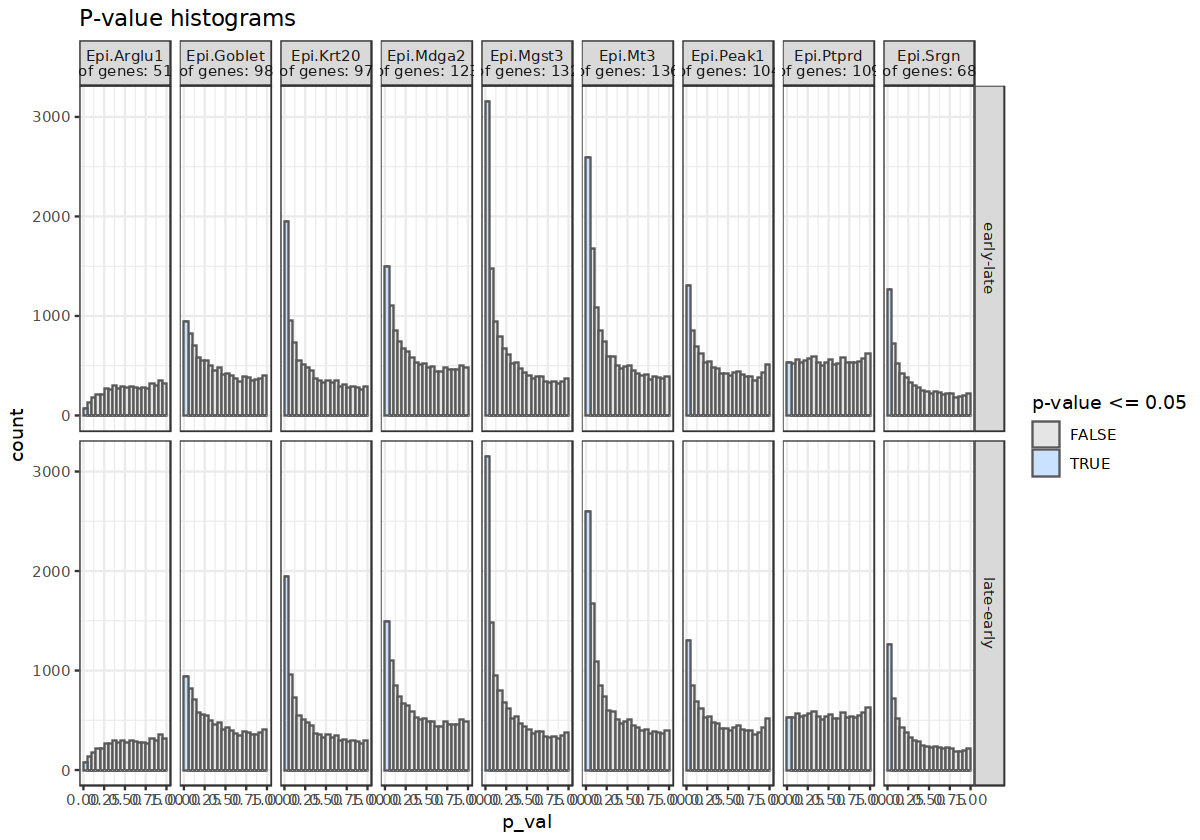

In [51]:
DE_info$hist_pvals

## Conclusion of the diagnostic plots concerning the DE analysis

In [52]:
empirical_pval = FALSE
if(empirical_pval == FALSE){
  celltype_de = DE_info$celltype_de$de_output_tidy
} else {
  celltype_de = DE_info_emp$de_output_tidy_emp %>% dplyr::select(-p_val, -p_adj) %>% dplyr::rename(p_val = p_emp, p_adj = p_adj_emp)
}

## Combine DE information for ligand-senders and receptors-receivers

In [53]:
sender_receiver_de = combine_sender_receiver_de(
  sender_de = celltype_de,
  receiver_de = celltype_de,
  senders_oi = senders_oi,
  receivers_oi = receivers_oi,
  lr_network = lr_network
)
sender_receiver_de %>% head(5)

contrast,sender,receiver,ligand,receptor,lfc_ligand,lfc_receptor,ligand_receptor_lfc_avg,p_val_ligand,p_adj_ligand,p_val_receptor,p_adj_receptor
<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
early-late,Epi.Srgn,Epi.Srgn,Fgf14,Scn3a,3.01,5.97,4.490,0.0832,0.325,0.0383,0.242
early-late,Epi.Mgst3,Epi.Srgn,Fgf13,Scn3a,2.62,5.97,4.295,0.0667,0.237,0.0383,0.242
early-late,Epi.Mdga2,Epi.Srgn,Fgf13,Scn3a,2.30,5.97,4.135,0.0730,0.445,0.0383,0.242
early-late,Epi.Arglu1,Epi.Mgst3,Sell,Unc5d,6.55,1.71,4.130,0.1160,0.999,0.1790,0.390
early-late,Epi.Arglu1,Epi.Mt3,Sell,Unc5d,6.55,1.67,4.110,0.1160,0.999,0.0094,0.232


# Step 3: Predict NicheNet ligand activities and NicheNet ligand-target links based on DEGs

In [54]:
logFC_threshold = 0.50
p_val_threshold = 0.05
fraction_cutoff = 0.05
p_val_adj =  FALSE 
#empirical_pval = FALSE
top_n_target = 500
verbose = TRUE
cores_system = 10
n.cores = min(cores_system, union(senders_oi, receivers_oi) %>% length()) 

In [55]:
ligand_activities_targets_DEgenes = suppressMessages(suppressWarnings(get_ligand_activities_targets_DEgenes(
  receiver_de = celltype_de,
  receivers_oi = receivers_oi,
  ligand_target_matrix = ligand_target_matrix,
  logFC_threshold = logFC_threshold,
  p_val_threshold = p_val_threshold,
  p_val_adj = p_val_adj,
  top_n_target = top_n_target,
  verbose = verbose, 
  n.cores = n.cores
)))

In [56]:
names(ligand_activities_targets_DEgenes)

[1] "ligand_activities" "de_genes_df"

In [57]:
ligand_activities_targets_DEgenes$de_genes_df %>% head(5)

gene,receiver,logFC,p_val,p_adj,contrast
<chr>,<chr>,<dbl>,<dbl>,<dbl>,<chr>
X1110004F10Rik,Epi.Arglu1,1.50,0.01360,0.999,late-early
Alad,Epi.Arglu1,1.30,0.04050,0.999,late-early
Bola1,Epi.Arglu1,1.49,0.00942,0.999,late-early
Cadps,Epi.Arglu1,3.21,0.00547,0.999,late-early
Cox20,Epi.Arglu1,1.07,0.04250,0.999,late-early


In [58]:
ligand_activities_targets_DEgenes$ligand_activities %>% head(5)

ligand,activity,contrast,target,ligand_target_weight,receiver,direction_regulation,activity_scaled
<chr>,<dbl>,<chr>,<chr>,<dbl>,<chr>,<fct>,<dbl>
X2300002M23Rik,-0.0016513963,late-early,H2az1,0.004597737,Epi.Arglu1,up,-0.54991800
X2300002M23Rik,-0.0016513963,late-early,Mgp,0.004200839,Epi.Arglu1,up,-0.54991800
X2610528A11Rik,-0.0007743297,late-early,H2az1,0.002279207,Epi.Arglu1,up,-0.07255235
X2610528A11Rik,-0.0007743297,late-early,Htra1,0.002313467,Epi.Arglu1,up,-0.07255235
X2610528A11Rik,-0.0007743297,late-early,Mgp,0.003132205,Epi.Arglu1,up,-0.07255235


# Step 4: Use the information collected above to prioritize all sender-ligand—receiver-receptor pairs

## Define the weights of the prioritization of both expression

In [59]:
prioritizing_weights_DE = c("de_ligand" = 1,
                         "de_receptor" = 1)
prioritizing_weights_activity = c("activity_scaled" = 2)

prioritizing_weights_expression_specificity = c("exprs_ligand" = 2,
                         "exprs_receptor" = 2)

prioritizing_weights_expression_sufficiency = c("frac_exprs_ligand_receptor" = 1)

prioritizing_weights_relative_abundance = c( "abund_sender" = 0,
                         "abund_receiver" = 0)

In [60]:
prioritizing_weights = c(prioritizing_weights_DE, 
                         prioritizing_weights_activity, 
                         prioritizing_weights_expression_specificity,
                         prioritizing_weights_expression_sufficiency, 
                         prioritizing_weights_relative_abundance)

## prioritize all sender-ligand—receiver-receptor pairs

In [61]:
sender_receiver_tbl = sender_receiver_de %>% dplyr::distinct(sender, receiver)

metadata_combined = SummarizedExperiment::colData(sce) %>% tibble::as_tibble()

if(!is.na(batches)){
  grouping_tbl = metadata_combined[,c(sample_id, group_id, batches)] %>% tibble::as_tibble() %>% dplyr::distinct()
  colnames(grouping_tbl) = c("sample","group",batches)
} else {
  grouping_tbl = metadata_combined[,c(sample_id, group_id)] %>% tibble::as_tibble() %>% dplyr::distinct()
  colnames(grouping_tbl) = c("sample","group")
}

## Run the prioritization

In [63]:
prioritization_tables = suppressMessages(generate_prioritization_tables(
  sender_receiver_info = abundance_expression_info$sender_receiver_info,
  sender_receiver_de = sender_receiver_de,
  ligand_activities_targets_DEgenes = ligand_activities_targets_DEgenes,
  contrast_tbl = contrast_tbl,
  sender_receiver_tbl = sender_receiver_tbl,
  grouping_tbl = grouping_tbl,
  prioritizing_weights = prioritizing_weights,
  fraction_cutoff = fraction_cutoff, 
  abundance_data_receiver = abundance_expression_info$abundance_data_receiver,
  abundance_data_sender = abundance_expression_info$abundance_data_sender
))

In [64]:
names(prioritization_tables)

[1] "group_prioritization_tbl"        "sample_prioritization_tbl"      
[3] "ligand_activities_target_de_tbl"

In [65]:
prioritization_tables$group_prioritization_tbl %>% head(5)

contrast,group,sender,receiver,ligand,receptor,lfc_ligand,lfc_receptor,ligand_receptor_lfc_avg,p_val_ligand,⋯,pb_ligand_group,scaled_pb_ligand,scaled_avg_exprs_receptor,scaled_avg_frq_receptor,pb_receptor_group,scaled_pb_receptor,fraction_expressing_ligand_receptor,max_scaled_activity,prioritization_score,top_group
<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
late-early,late,Epi.Srgn,Epi.Peak1,Il1rn,Il1r2,2.30,3.32,2.810,0.00108,⋯,7.612302,1.001,0.4629556,0.4410764,6.733816,1.001,1,0.9909270,0.9952605,late
late-early,late,Epi.Srgn,Epi.Peak1,Il1rn,Il1r2,2.30,3.32,2.810,0.00108,⋯,7.612302,1.001,0.4629556,0.4410764,6.733816,1.001,1,0.9909270,0.9952605,late
late-early,late,Epi.Srgn,Epi.Srgn,Csf1,Csf2ra,1.69,1.46,1.575,0.01230,⋯,5.819125,1.001,1.0010000,0.5739434,6.150176,1.001,1,0.9951646,0.9862575,late
late-early,late,Epi.Srgn,Epi.Srgn,Csf1,Csf2ra,1.69,1.46,1.575,0.01230,⋯,5.819125,1.001,1.0010000,0.5739434,6.150176,1.001,1,0.9951646,0.9862575,late
late-early,late,Epi.Srgn,Epi.Srgn,Csf1,Csf1r,1.69,1.20,1.445,0.01230,⋯,5.819125,1.001,1.0010000,1.0010000,6.108018,1.001,1,0.9951646,0.9702089,late


In [66]:
prioritization_tables$sample_prioritization_tbl %>% head(5)

sample,sender,receiver,ligand,receptor,avg_ligand,avg_receptor,ligand_receptor_prod,fraction_ligand,fraction_receptor,⋯,lr_interaction,id,scaled_LR_prod,scaled_LR_frac,scaled_LR_pb_prod,n_cells_receiver,keep_receiver,n_cells_sender,keep_sender,keep_sender_receiver
<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
X148_T1,Epi.Krt20,Epi.Krt20,Epcam,Cldn7,4.071422,3.312358,13.48601,1,1.0000000,⋯,Epcam_Cldn7,Epcam_Cldn7_Epi.Krt20_Epi.Krt20,2.0264412,0.5076579,1.875069,79,1,79,1,Sender & Receiver present
X151_T4,Epi.Arglu1,Epi.Arglu1,Tyrobp,Trem1,3.822304,3.150798,12.04331,1,1.0000000,⋯,Tyrobp_Trem1,Tyrobp_Trem1_Epi.Arglu1_Epi.Arglu1,2.3915794,1.9012820,1.361397,1,0,1,0,Sender & Receiver absent
X148_T1,Epi.Mgst3,Epi.Krt20,Epcam,Cldn7,3.472229,3.312358,11.50126,1,1.0000000,⋯,Epcam_Cldn7,Epcam_Cldn7_Epi.Mgst3_Epi.Krt20,2.0932097,1.0153522,2.038634,79,1,335,1,Sender & Receiver present
X142_T2,Epi.Krt20,Epi.Krt20,Epcam,Cldn7,3.930621,2.817565,11.07478,1,0.9658120,⋯,Epcam_Cldn7,Epcam_Cldn7_Epi.Krt20_Epi.Krt20,0.8260239,-0.7505783,1.047391,117,1,117,1,Sender & Receiver present
X148_T1,Epi.Krt20,Epi.Mgst3,Epcam,Cldn7,4.071422,2.665334,10.85170,1,0.9731343,⋯,Epcam_Cldn7,Epcam_Cldn7_Epi.Krt20_Epi.Mgst3,1.9561871,0.4894522,1.960864,335,1,79,1,Sender & Receiver present


# Step 5: Add information on prior knowledge and expression correlation between LR and target expression.

In [67]:
lr_target_prior_cor = lr_target_prior_cor_inference(prioritization_tables$group_prioritization_tbl$receiver %>% unique(), 
                                                    abundance_expression_info, celltype_de, grouping_tbl, prioritization_tables, 
                                                    ligand_target_matrix, logFC_threshold = logFC_threshold, 
                                                    p_val_threshold = p_val_threshold, p_val_adj = p_val_adj)

In [68]:
names(lr_target_prior_cor)

[1] "sender"         "receiver"       "ligand"         "receptor"      
 [5] "id"             "target"         "pearson"        "pearson_pval"  
 [9] "spearman"       "spearman_pval"  "prior_score"    "rank_of_target"
[13] "rank_of_ligand" "id_target"

# select

In [ ]:
all_prioritization_tbl=prioritization_tables$group_prioritization_tbl%>%distinct(ligand,receptor,.keep_all = T)

In [ ]:
head(all_prioritization_tbl,n=5)
dim(all_prioritization_tbl)
table(all_prioritization_tbl$sender,all_prioritization_tbl$receiver)

In [ ]:
prioritization_tables$group_prioritization_tbl=all_prioritization_tbl

# Save all the output of MultiNicheNet

In [69]:
multinichenet_output = list(
    celltype_info = abundance_expression_info$celltype_info,
    celltype_de = celltype_de,
    sender_receiver_info = abundance_expression_info$sender_receiver_info,
    sender_receiver_de =  sender_receiver_de,
    ligand_activities_targets_DEgenes = ligand_activities_targets_DEgenes,
    prioritization_tables = prioritization_tables,
    grouping_tbl = grouping_tbl,
    lr_target_prior_cor = lr_target_prior_cor
  ) 
multinichenet_output = make_lite_output(multinichenet_output)

In [70]:
#saveRDS(multinichenet_output, "results/multinichenet_output.rds")

In [3]:
multinichenet_output=readRDS("results/multinichenet_output.rds")

# Visualization of the results

## circos

### top50 of two group in one plot

In [71]:
prioritized_tbl_oi_all = get_top_n_lr_pairs(multinichenet_output$prioritization_tables, 50, rank_per_group = FALSE)

In [72]:
names(prioritized_tbl_oi_all)

[1] "group"                "sender"               "receiver"            
[4] "ligand"               "receptor"             "id"                  
[7] "prioritization_score" "prioritization_rank"

In [73]:
pdf("results/plot/circos.pdf",width = 10,height = 10)
prioritized_tbl_oi = multinichenet_output$prioritization_tables$group_prioritization_tbl %>%
  filter(id %in% prioritized_tbl_oi_all$id) %>%
  distinct(id, sender, receiver, ligand, receptor, group) %>% left_join(prioritized_tbl_oi_all)
prioritized_tbl_oi$prioritization_score[is.na(prioritized_tbl_oi$prioritization_score)] = 0

senders_receivers = union(prioritized_tbl_oi$sender %>% unique(), prioritized_tbl_oi$receiver %>% unique()) %>% sort()

colors_sender = RColorBrewer::brewer.pal(n = length(senders_receivers), name = 'Spectral') %>% magrittr::set_names(senders_receivers)
colors_receiver = RColorBrewer::brewer.pal(n = length(senders_receivers), name = 'Spectral') %>% magrittr::set_names(senders_receivers)

circos_list = make_circos_group_comparison(prioritized_tbl_oi, colors_sender, colors_receiver)
dev.off()

Joining with `by = join_by(id, sender, receiver, ligand, receptor, group)`
Joining with `by = join_by(sender)`
Joining with `by = join_by(receiver)`
Joining with `by = join_by(sender)`
Joining with `by = join_by(receiver)`


png 
  2

### top30 of one group in a plot 

In [74]:
prioritized_tbl_oi_early_30 = get_top_n_lr_pairs(multinichenet_output$prioritization_tables, 30, groups_oi = "early")
prioritized_tbl_oi_late_30 = get_top_n_lr_pairs(multinichenet_output$prioritization_tables, 30, groups_oi = "late")

Joining with `by = join_by(sender)`
Joining with `by = join_by(receiver)`


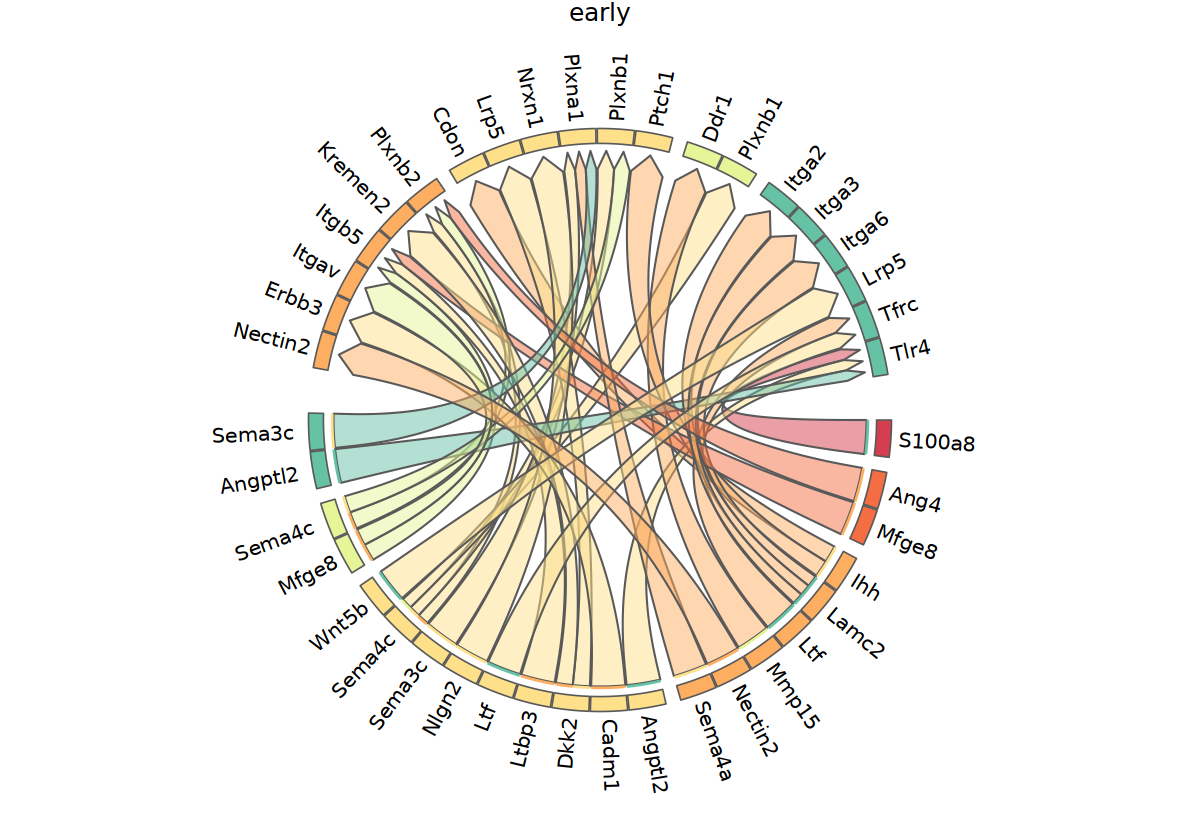

Joining with `by = join_by(sender)`
Joining with `by = join_by(receiver)`


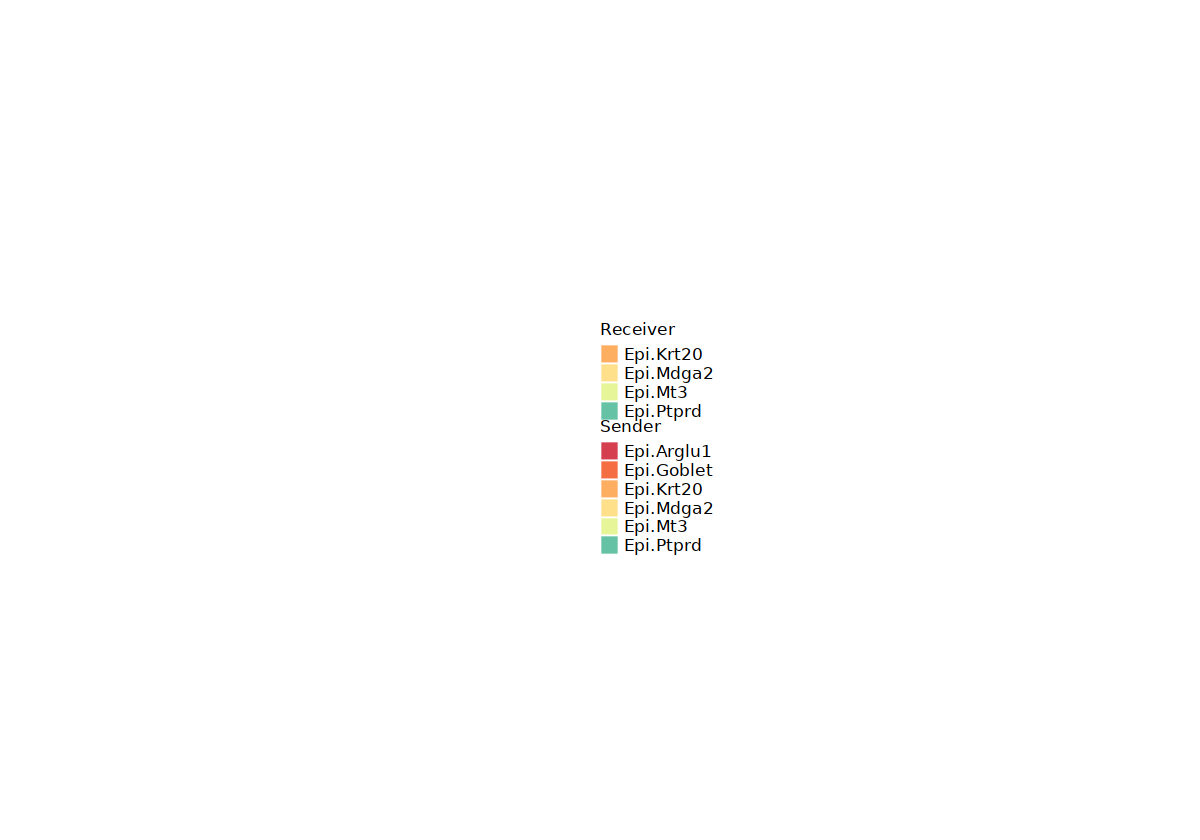

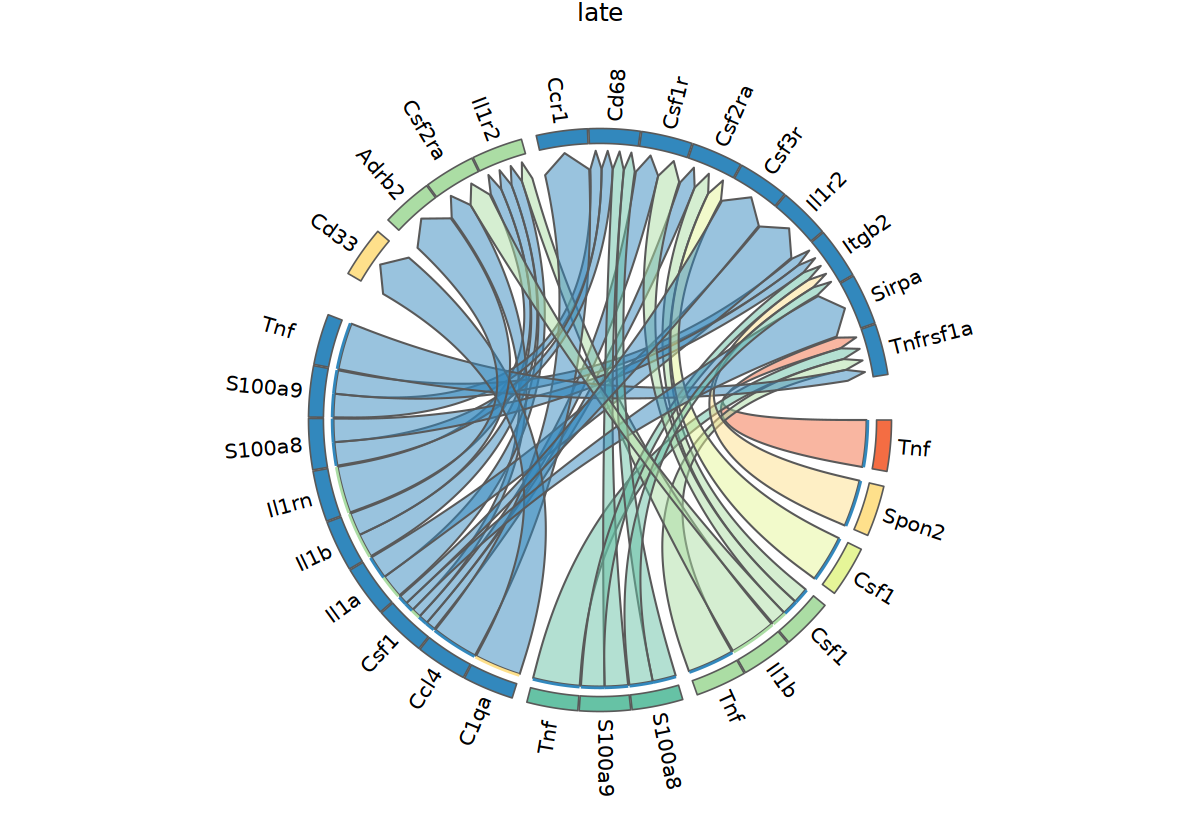

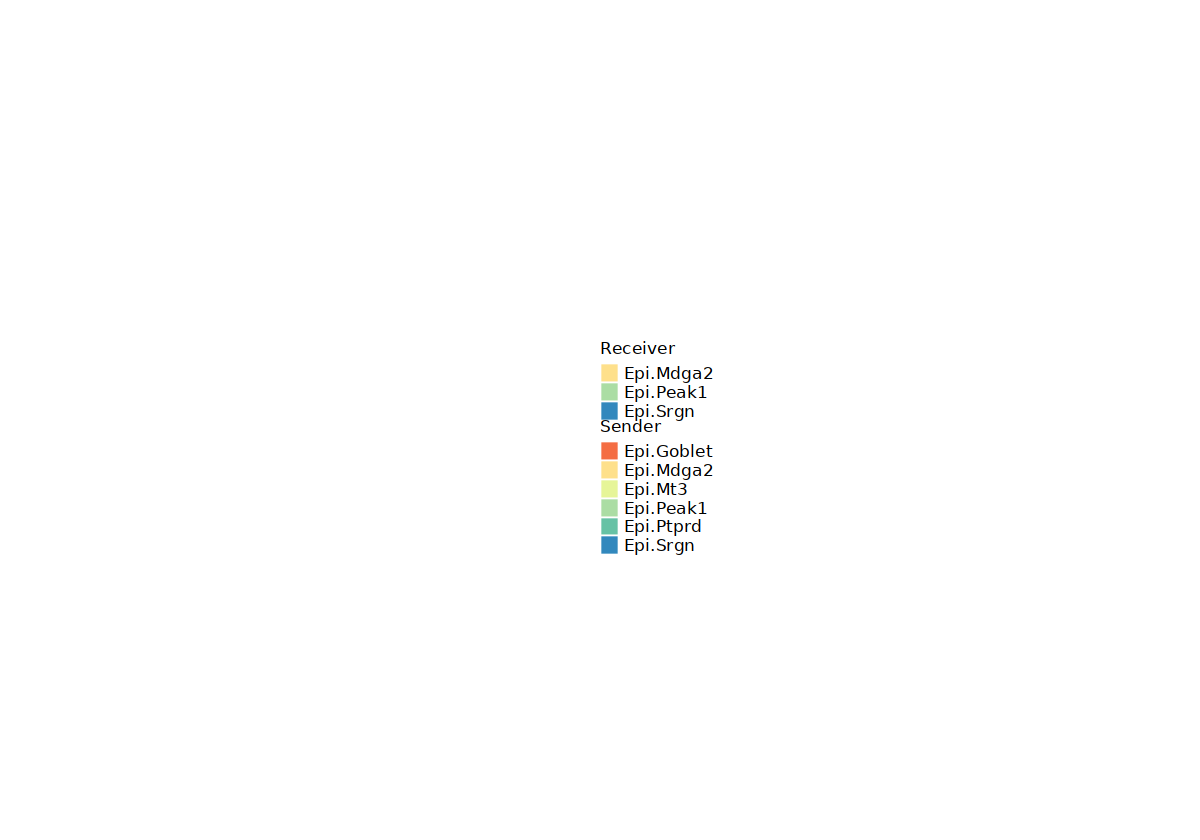

In [76]:
circos_early = make_circos_one_group(prioritized_tbl_oi_early_30, colors_sender, colors_receiver)
circos_late = make_circos_one_group(prioritized_tbl_oi_late_30, colors_sender, colors_receiver)

## Visualization of scaled ligand-receptor pseudobulk products and ligand activity

In [77]:
group_oi = "early"

In [ ]:
options(repr.plot.width=20)
prioritized_tbl_oi_M_50 = get_top_n_lr_pairs(multinichenet_output$prioritization_tables, 50, groups_oi = group_oi)

plot_oi = make_sample_lr_prod_activity_plots(multinichenet_output$prioritization_tables, prioritized_tbl_oi_M_50)
plot_oi

In [79]:
head(prioritized_tbl_oi_M_50)

group,sender,receiver,ligand,receptor,id,prioritization_score,prioritization_rank
<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>
early,Epi.Mdga2,Epi.Krt20,Sema4c,Plxnb2,Sema4c_Plxnb2_Epi.Mdga2_Epi.Krt20,0.9578441,1
early,Epi.Arglu1,Epi.Ptprd,S100a8,Tlr4,S100a8_Tlr4_Epi.Arglu1_Epi.Ptprd,0.9552884,2
early,Epi.Mdga2,Epi.Mdga2,Sema4c,Plxnb1,Sema4c_Plxnb1_Epi.Mdga2_Epi.Mdga2,0.9378654,3
early,Epi.Krt20,Epi.Mdga2,Ihh,Cdon,Ihh_Cdon_Epi.Krt20_Epi.Mdga2,0.9226908,4
early,Epi.Mdga2,Epi.Mt3,Sema4c,Plxnb1,Sema4c_Plxnb1_Epi.Mdga2_Epi.Mt3,0.9217427,5
early,Epi.Mt3,Epi.Krt20,Sema4c,Plxnb2,Sema4c_Plxnb2_Epi.Mt3_Epi.Krt20,0.9179499,6


In [80]:
ggsave(plot_oi,filename = "results/plot/htbarplotEarly.pdf",width = 10,height = 10)

In [ ]:
ggsave(plot_oi,filename = "results/plot/htbarplotLate.pdf",width = 10,height = 10)

# select LR
只需要筛选multinichenet_output$prioritization_tables中的group_prioritization_tbl,并把结果改造成prioritized_tbl_oi_M_50的样式即可。

In [81]:
selectedPrioritization_tables=multinichenet_output$prioritization_tables

In [82]:
names(selectedPrioritization_tables)

[1] "group_prioritization_tbl"        "sample_prioritization_tbl"      
[3] "ligand_activities_target_de_tbl"

In [83]:
colnames(selectedPrioritization_tables$group_prioritization_tbl)

[1] "contrast"                            "group"                              
 [3] "sender"                              "receiver"                           
 [5] "ligand"                              "receptor"                           
 [7] "lfc_ligand"                          "lfc_receptor"                       
 [9] "ligand_receptor_lfc_avg"             "p_val_ligand"                       
[11] "p_adj_ligand"                        "p_val_receptor"                     
[13] "p_adj_receptor"                      "activity"                           
[15] "direction_regulation"                "activity_scaled"                    
[17] "lr_interaction"                      "id"                                 
[19] "avg_ligand_group"                    "avg_receptor_group"                 
[21] "ligand_receptor_prod_group"          "fraction_ligand_group"              
[23] "fraction_receptor_group"             "ligand_receptor_fraction_prod_group"
[25] "rel_abundance_scaled_sender"         "rel_abundance_scaled_receiver"      
[27] "sender_receiver_rel_abundance_avg"   "lfc_pval_ligand"                    
[29] "p_val_ligand_adapted"                "scaled_lfc_ligand"                  
[31] "scaled_p_val_ligand"                 "scaled_lfc_pval_ligand"             
[33] "scaled_p_val_ligand_adapted"         "lfc_pval_receptor"                  
[35] "p_val_receptor_adapted"              "scaled_lfc_receptor"                
[37] "scaled_p_val_receptor"               "scaled_lfc_pval_receptor"           
[39] "scaled_p_val_receptor_adapted"       "activity_up"                        
[41] "activity_scaled_up"                  "scaled_activity_scaled_up"          
[43] "scaled_activity_up"                  "activity_down"                      
[45] "activity_scaled_down"                "scaled_activity_scaled_down"        
[47] "scaled_activity_down"                "scaled_avg_exprs_ligand"            
[49] "scaled_avg_frq_ligand"               "pb_ligand_group"                    
[51] "scaled_pb_ligand"                    "scaled_avg_exprs_receptor"          
[53] "scaled_avg_frq_receptor"             "pb_receptor_group"                  
[55] "scaled_pb_receptor"                  "fraction_expressing_ligand_receptor"
[57] "max_scaled_activity"                 "prioritization_score"               
[59] "top_group"

In [84]:
selectedLRtable=selectedPrioritization_tables$group_prioritization_tbl%>%
select(group,sender,receiver,ligand,receptor,id,prioritization_score)%>%
filter(group=="early")

In [85]:
head(selectedLRtable)
dim(selectedLRtable)

group,sender,receiver,ligand,receptor,id,prioritization_score
<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>
early,Epi.Mdga2,Epi.Krt20,Sema4c,Plxnb2,Sema4c_Plxnb2_Epi.Mdga2_Epi.Krt20,0.9578441
early,Epi.Mdga2,Epi.Krt20,Sema4c,Plxnb2,Sema4c_Plxnb2_Epi.Mdga2_Epi.Krt20,0.9578441
early,Epi.Arglu1,Epi.Ptprd,S100a8,Tlr4,S100a8_Tlr4_Epi.Arglu1_Epi.Ptprd,0.9552884
early,Epi.Arglu1,Epi.Ptprd,S100a8,Tlr4,S100a8_Tlr4_Epi.Arglu1_Epi.Ptprd,0.9552884
early,Epi.Mdga2,Epi.Mdga2,Sema4c,Plxnb1,Sema4c_Plxnb1_Epi.Mdga2_Epi.Mdga2,0.9378654
early,Epi.Mdga2,Epi.Mdga2,Sema4c,Plxnb1,Sema4c_Plxnb1_Epi.Mdga2_Epi.Mdga2,0.9378654


[1] 114790      7

In [86]:
#selectedLRtable$ligand[str_detect(selectedLRtable$ligand,"Dsc")]

In [87]:
#selectedLRtable$receptor[str_detect(selectedLRtable$receptor,"Dsg")]

In [88]:
selectedLRtable=selectedLRtable%>%filter(ligand %in% c("Sema4g","Lama3","Lamb3","Lamc1","Lamc2","Cdh1","Dsc2") &
                                         receptor %in% c("Plxnb2","'Itga1","Itga2","Itga3","Itga6","Itgb1","Dag1","Cd44","Dsg2"))

In [89]:
dim(selectedLRtable)

[1] 2682    7

In [90]:
selectedtable=selectedLRtable[1:100,]

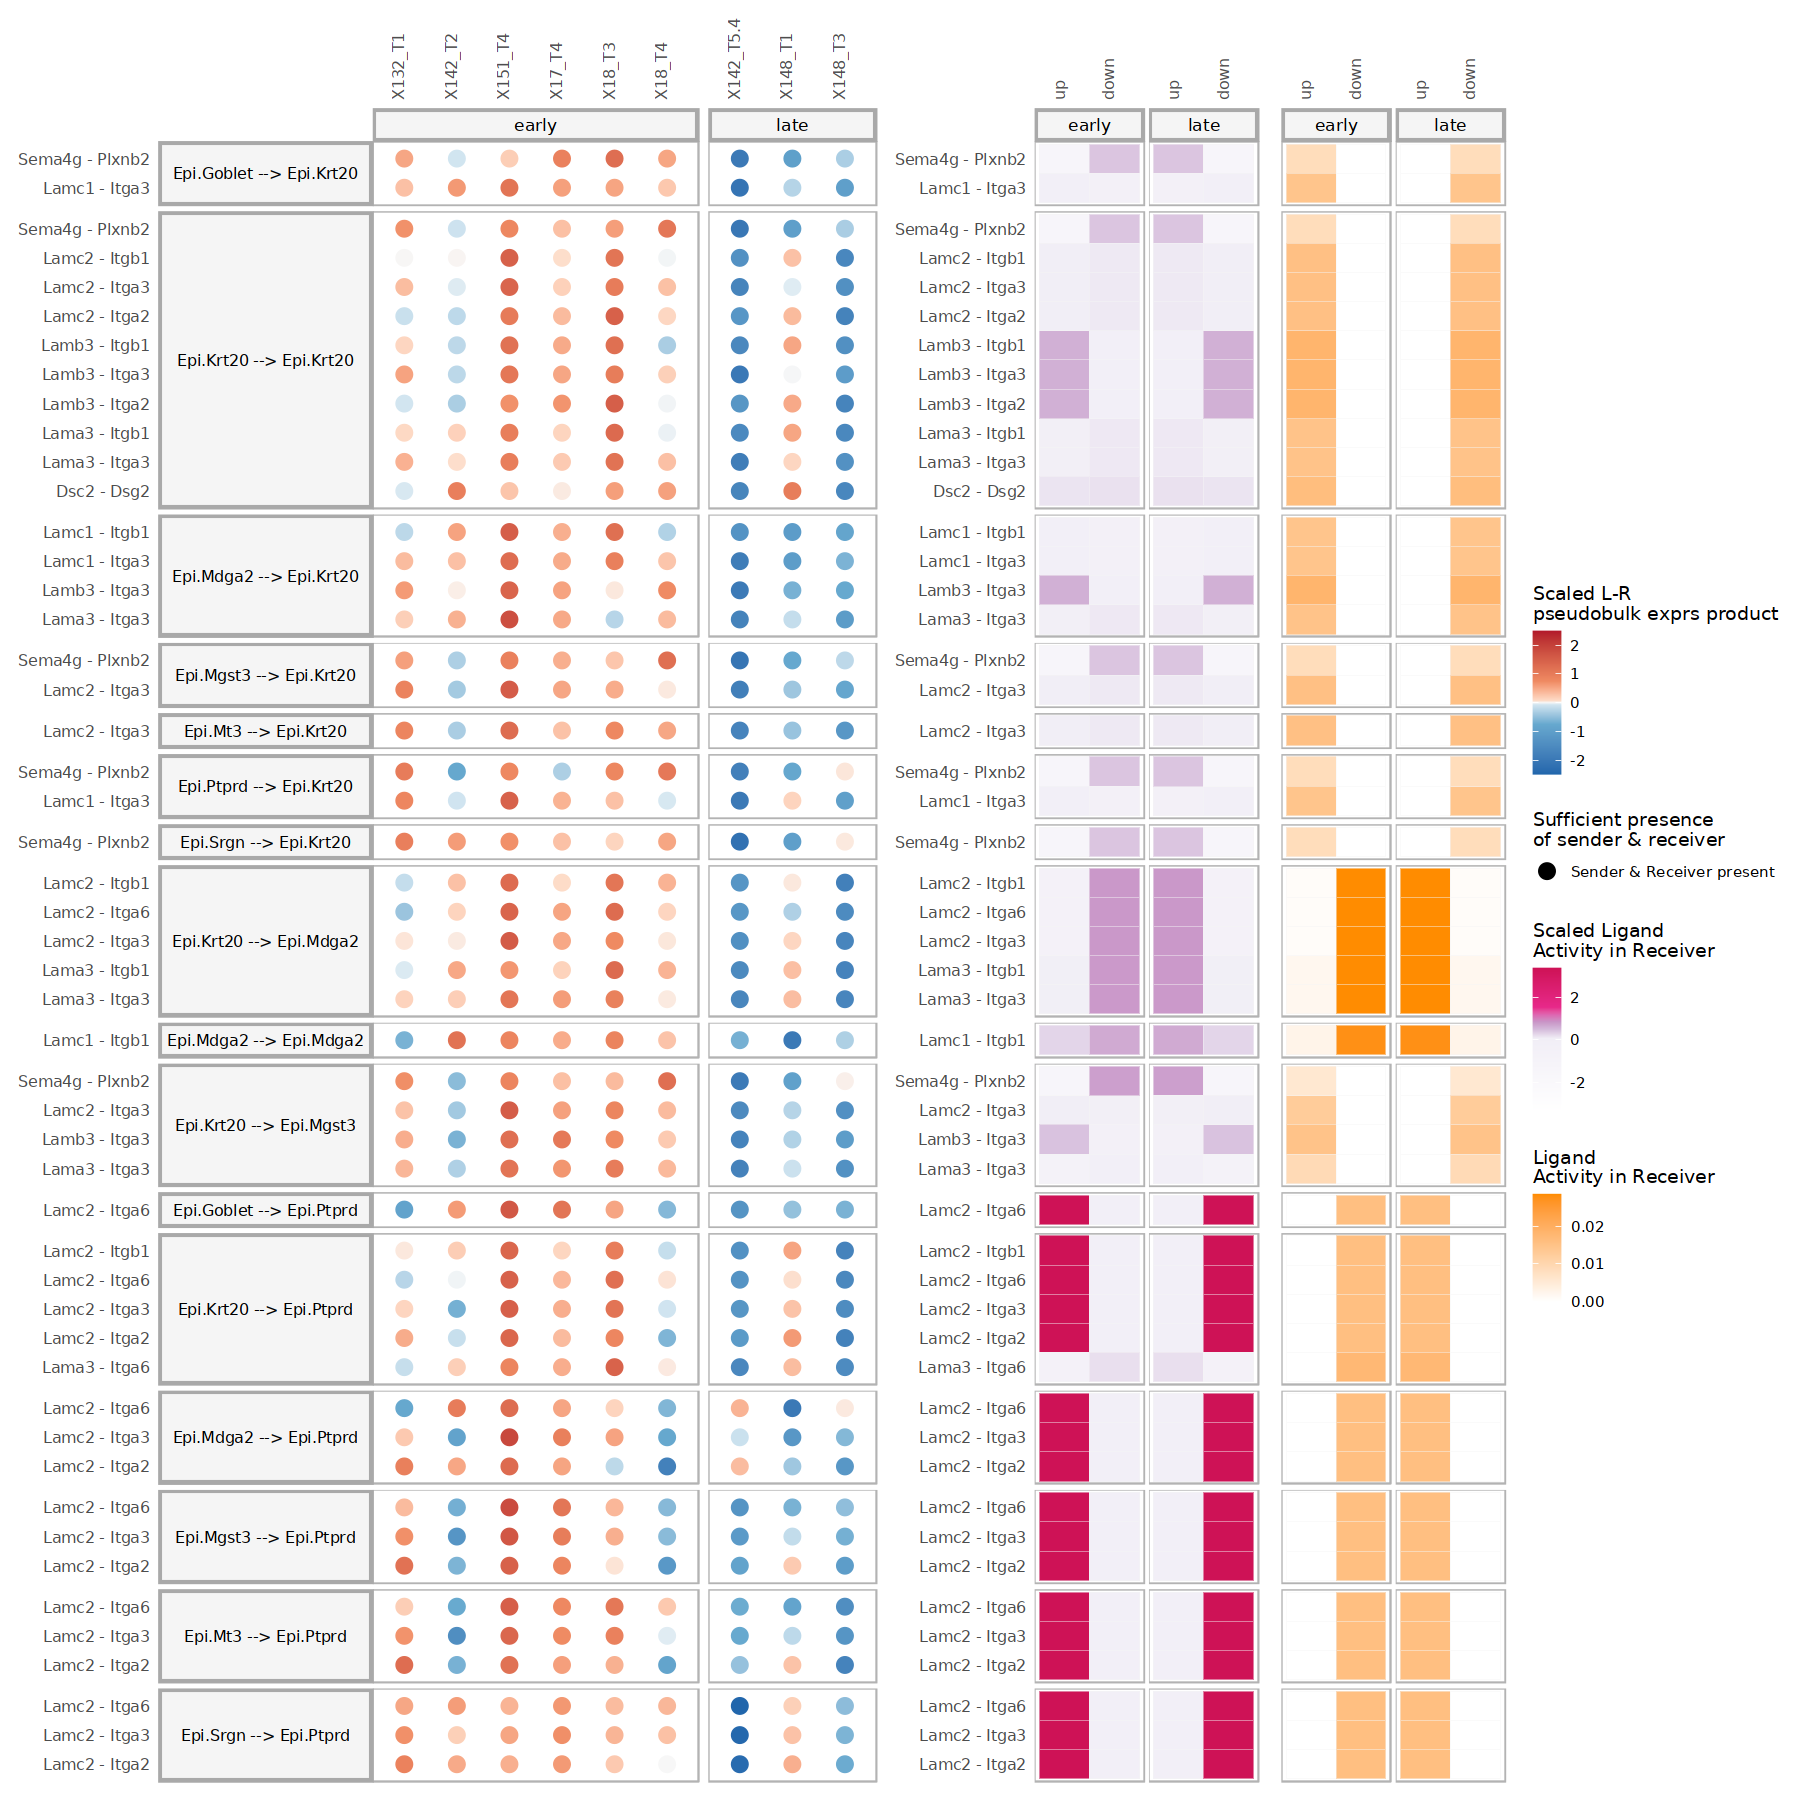

In [98]:
options(repr.plot.width=15,repr.plot.height=15)
#prioritized_tbl_oi_M_50 = get_top_n_lr_pairs(selectedLRtable, 50, groups_oi = group_oi)

plot_oi = make_sample_lr_prod_activity_plots(multinichenet_output$prioritization_tables, selectedtable)
plot_oi

In [99]:
ggsave(plot_oi,filename = "results/plot/selectedLR.pdf",width = 10,height = 12 )

In [100]:
LRtable=selectedPrioritization_tables$group_prioritization_tbl%>%
filter(group=="early")

In [101]:
LRtable=LRtable%>%filter(ligand %in% c("Sema4g","Lama3","Lamb3","Lamc1","Lamc2","Cdh1","Dsc2") &
                                         receptor %in% c("Plxnb2","'Itga1","Itga2","Itga3","Itga6","Itgb1","Dag1","Cd44","Dsg2"))
dim(LRtable)

[1] 2682   59

In [102]:
write_xlsx(LRtable,"results/14LRtable.xlsx")